# digits example



In [22]:
# import data
import numpy as np
from sklearn import datasets
data, labels = datasets.load_digits().data, datasets.load_digits().target

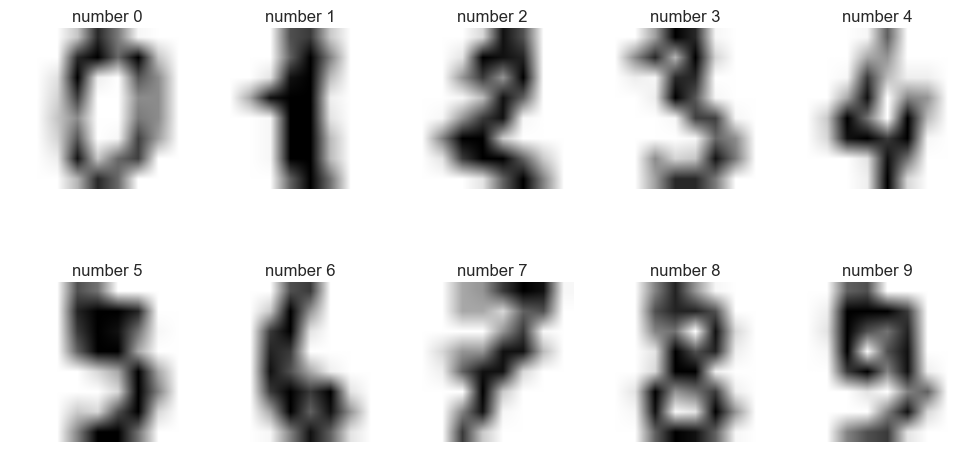

In [52]:
from seaborn import plt

u_labels = np.unique(labels)
f, axs = plt.subplots(2,5, figsize=(12,6))
flat_axs = axs.flatten()
for u_label in u_labels:
    flat_axs[u_label].imshow(
        data[np.where(labels == u_label)[0][0]].reshape((8,8)))
    flat_axs[u_label].set_title("number {}".format(u_label))
    flat_axs[u_label].set_axis_off()

f

In [86]:
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(data)

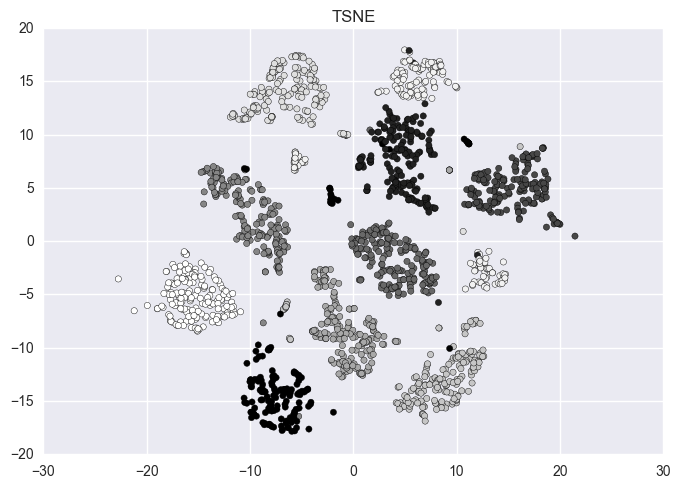

In [92]:
fig, ax = plt.subplots()
ax.scatter(tsne[:,0],tsne[:,1],c=labels)
ax.set_title("TSNE")
fig

In [102]:
from cartographer.mapper import Mapper
from sklearn.preprocessing import FunctionTransformer
from cartographer.visualization import html_graph
from IPython.core.display import HTML

m = Mapper(coverer=HyperRectangleCoverer(intervals=20, overlap=0.6),
           filterer=FunctionTransformer(), # does nothing
           clusterer=DBSCAN(min_samples=7,eps=0.27))
m.fit(tsne)

HTML(html_graph(m, {"labels" : labels},
                { "tsne_x" : tsne[:,0],
                  "tsne_y" : tsne[:,1]}))